<a href="https://colab.research.google.com/github/VinithKK/Data-Analytics-Internship/blob/main/Task1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
pip install pandas numpy matplotlib seaborn

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Load the dataset
df = pd.read_csv('/healthcare_dataset.csv')

In [34]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [35]:
# Display basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [36]:
# Display summary statistics for numerical features
print(df.describe())

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


<b>Handle Missing Values</b>

In [37]:
# Display summary statistics for categorical features
print(df.describe(include=['object']))

               Name Gender Blood Type Medical Condition Date of Admission  \
count         55500  55500      55500             55500             55500   
unique        49992      2          8                 6              1827   
top     DAvId muNoZ   Male         A-         Arthritis        2024-03-16   
freq              3  27774       6969              9308                50   

               Doctor   Hospital Insurance Provider Admission Type  \
count           55500      55500              55500          55500   
unique          40341      39876                  5              3   
top     Michael Smith  LLC Smith              Cigna       Elective   
freq               27         44              11249          18655   

       Discharge Date Medication Test Results  
count           55500      55500        55500  
unique           1856          5            3  
top        2020-03-15    Lipitor     Abnormal  
freq               53      11140        18627  


<b> Analyze Data Distributions</b>

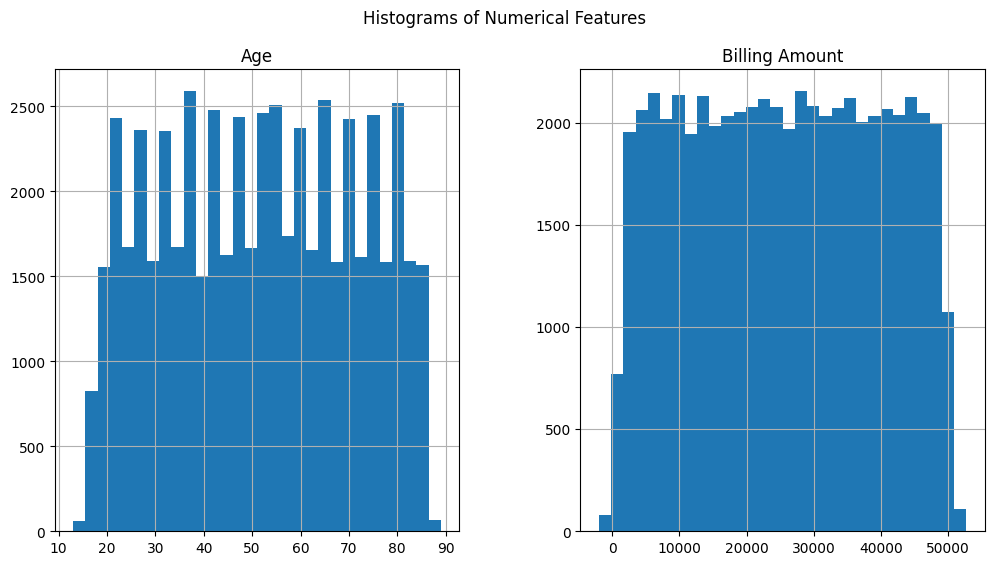

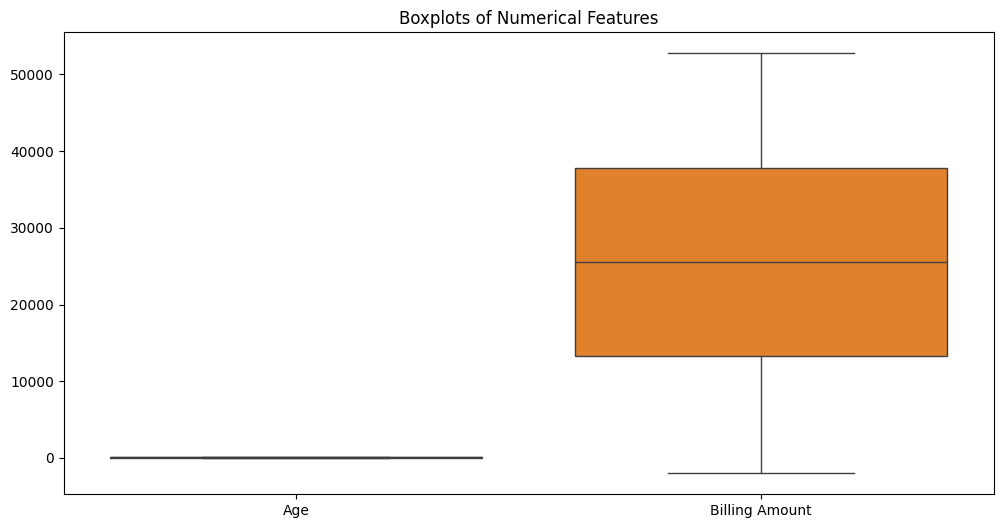

In [38]:
# Histograms for numerical features
df[['Age', 'Billing Amount']].hist(figsize=(12, 6), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Billing Amount']])
plt.title('Boxplots of Numerical Features')
plt.show()


<b>Explore Categorical Data<b/>

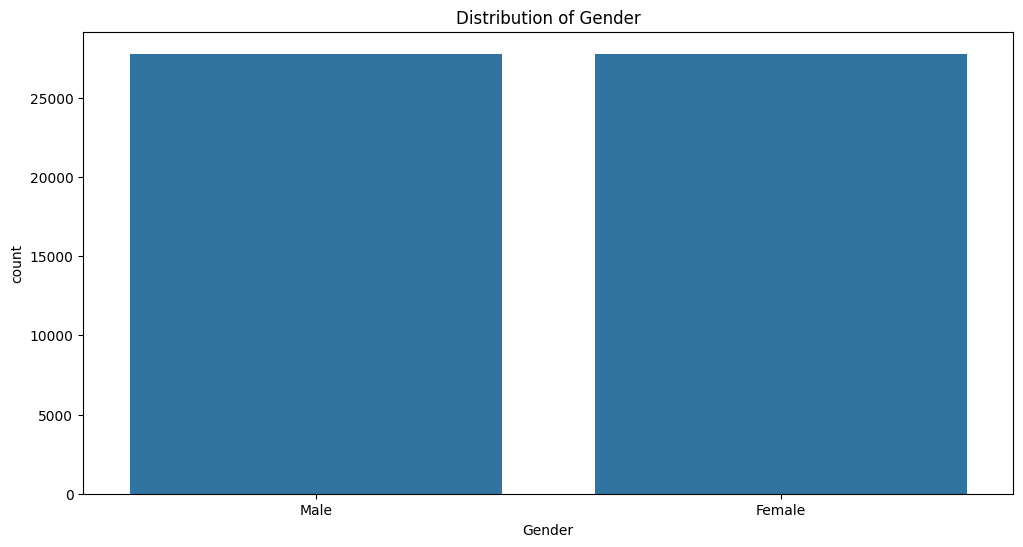

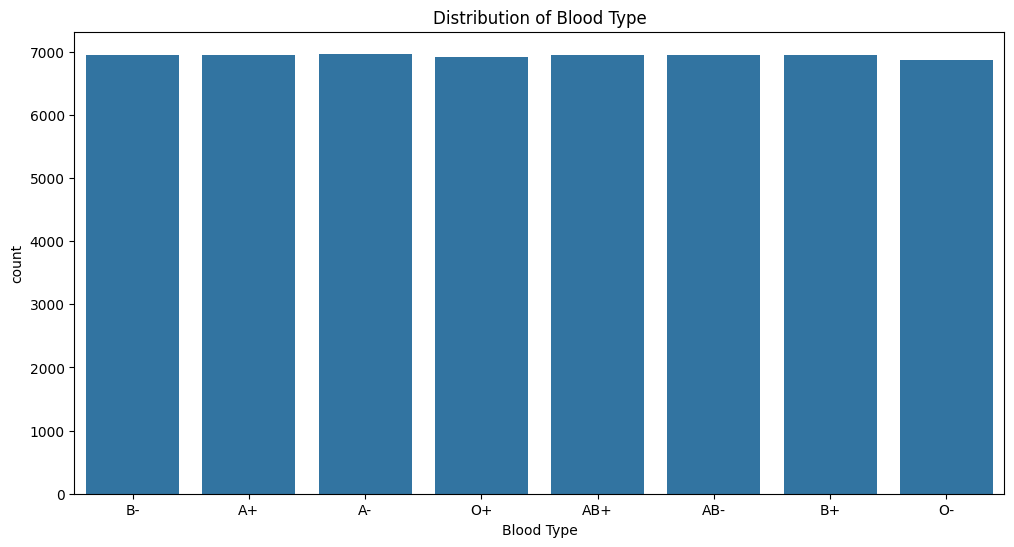

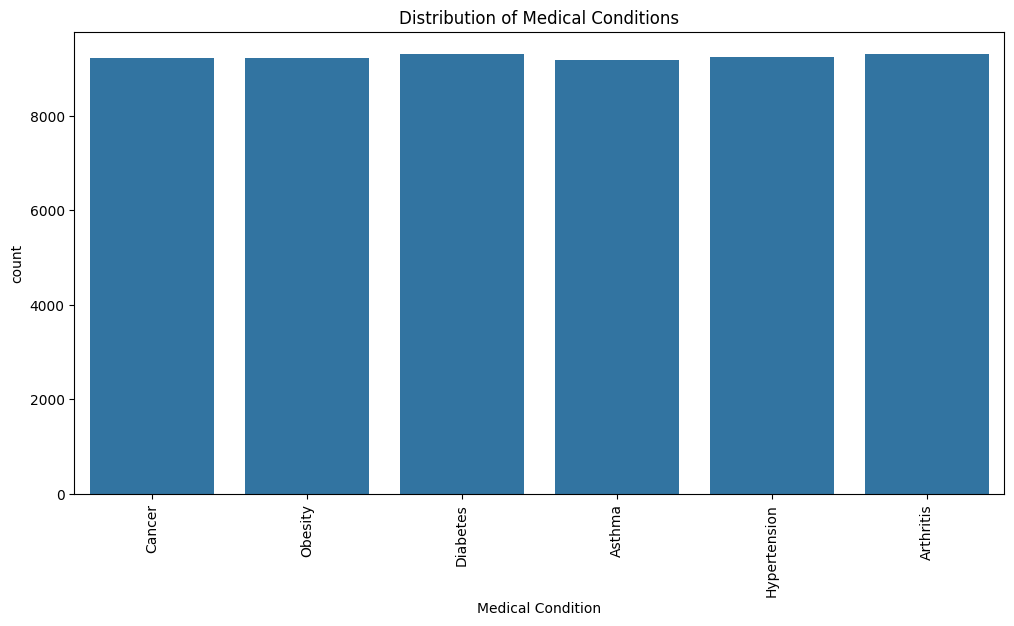

In [39]:
# Count plots for categorical features
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Blood Type')
plt.title('Distribution of Blood Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Medical Condition')
plt.xticks(rotation=90)
plt.title('Distribution of Medical Conditions')
plt.show()

<b>Analyze Date-related Data<b/>

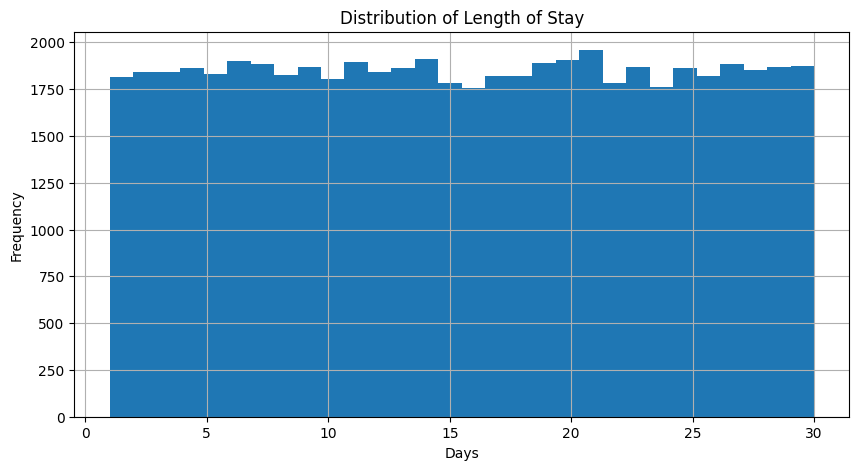

In [40]:
# Convert date columns to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate length of stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Histogram of length of stay
plt.figure(figsize=(10, 5))
df['Length of Stay'].hist(bins=30)
plt.title('Distribution of Length of Stay')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

<b>Analyze Relationships and Correlations<b/>

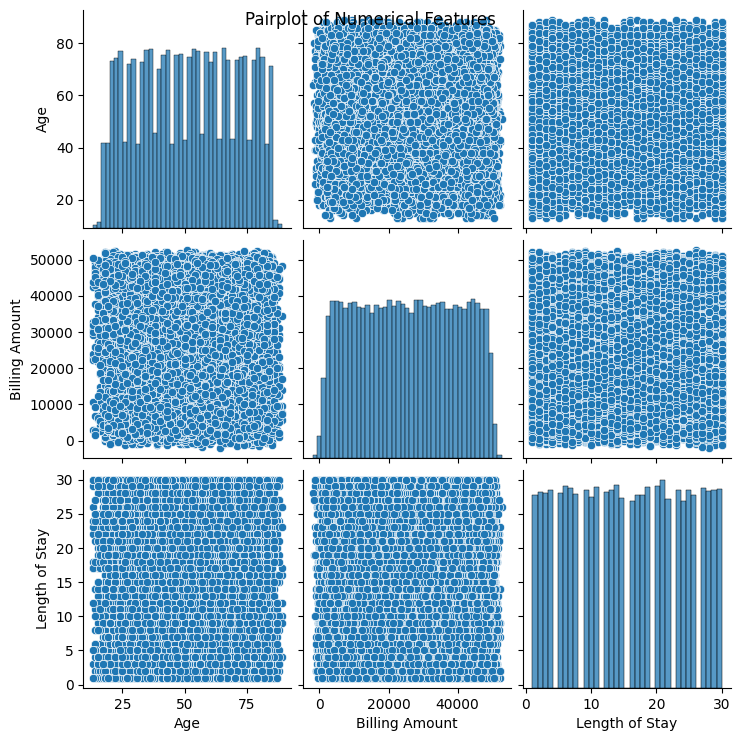

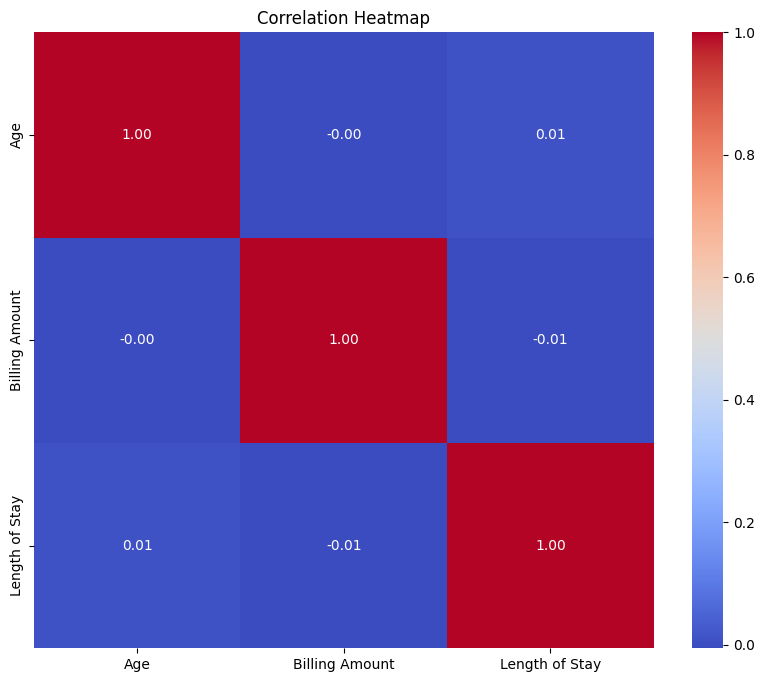

In [41]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[['Age', 'Billing Amount', 'Length of Stay']])
plt.suptitle('Pairplot of Numerical Features')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age', 'Billing Amount', 'Length of Stay']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<b>Examine Relationships Between Categorical and Numerical Data<b/>

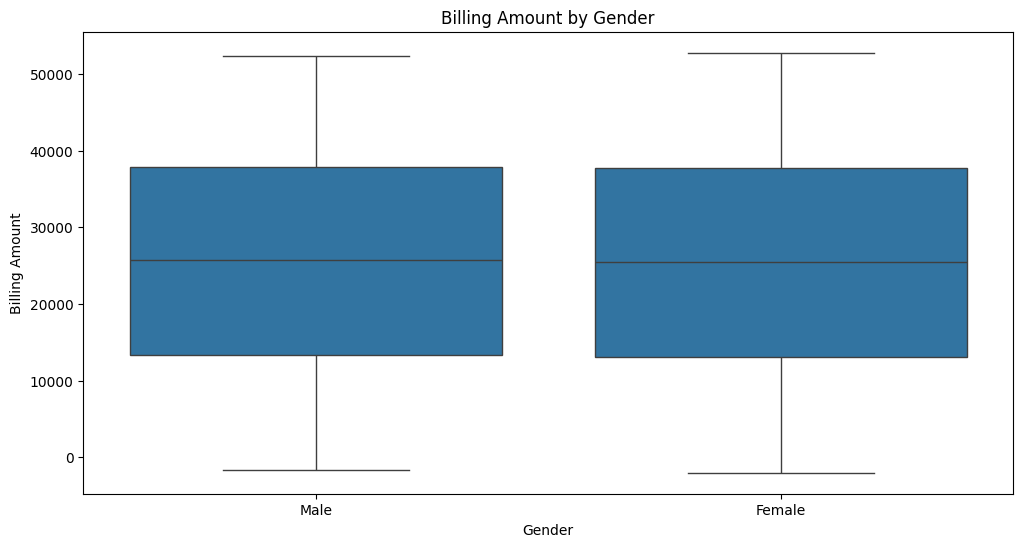

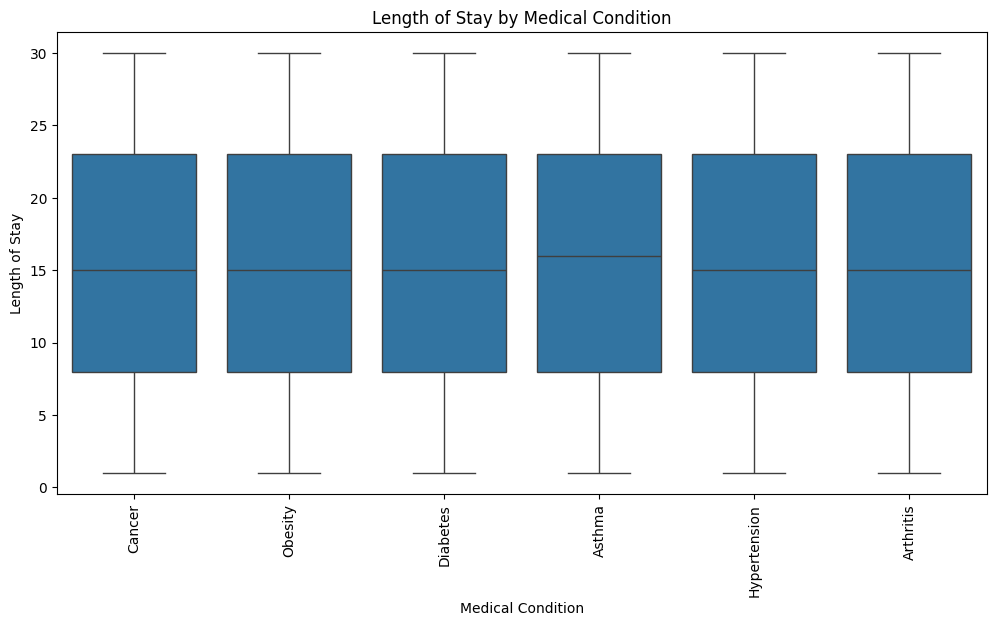

In [42]:
# Boxplot of billing amount by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='Billing Amount')
plt.title('Billing Amount by Gender')
plt.show()

# Boxplot of length of stay by medical condition
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Medical Condition', y='Length of Stay')
plt.xticks(rotation=90)
plt.title('Length of Stay by Medical Condition')
plt.show()

<b>Advanced Analysis (Optional)<b/>

In [43]:
# Average billing amount by hospital
print(df.groupby('Hospital')['Billing Amount'].mean())

Hospital
Abbott Inc                       38052.041917
Abbott Ltd                       29877.586483
Abbott Moore and Williams,       24799.596339
Abbott and Thompson, Sullivan    16738.569765
Abbott, Peters and Hoffman       18842.396863
                                     ...     
and Zimmerman Sons               32706.652625
and Zuniga Davis Carlson,        42867.041298
and Zuniga Francis Peterson,     33689.630726
and Zuniga Sons                  33950.170483
and Zuniga Thompson, Blake       22067.428763
Name: Billing Amount, Length: 39876, dtype: float64
